# Merging Seismograms
The following example shows how to merge and plot three seismograms with overlaps, the longest one is taken to be the right one. Please also refer to the documentation of the merge() method.

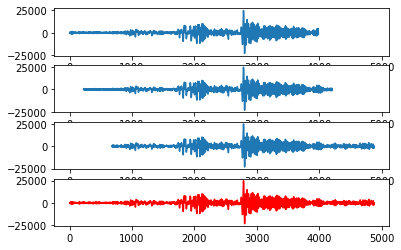

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import obspy


# Read in all files starting with dis.
st = obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE")
st += obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE.1")
st += obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE.2")

# sort
#.sort = can be used to sort a list in ascending, descending or user defined order.
st.sort(['starttime'])
# start time in plot equals 0
#using st[0](after sorting) as start time
dt = st[0].stats.starttime.timestamp

# Go through the stream object, determine time range in julian seconds
# and plot the data with a shared x axis
#julian seconds = seconds in year (normal and leap year are different)
ax = plt.subplot(4, 1, 1)  # dummy for tying axis
for i in range(3):
    plt.subplot(4, 1, i + 1, sharex=ax)
    t = np.linspace(st[i].stats.starttime.timestamp - dt,
                    st[i].stats.endtime.timestamp - dt,
                    st[i].stats.npts)
    plt.plot(t, st[i].data)

# Merge the data together and show plot in a similar way
st.merge(method=1)
plt.subplot(4, 1, 4, sharex=ax)
t = np.linspace(st[0].stats.starttime.timestamp - dt,
                st[0].stats.endtime.timestamp - dt,
                st[0].stats.npts)
plt.plot(t, st[0].data, 'r')
plt.show();